# Project 4a - Image Warping and Mosaicing

### Dependencies

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils import computeH, warpImage, warpPoints, align_and_blend_images

## Shoot and digitize pictures

In [2]:
computer_screen = plt.imread('../data/4a/img/IMG_8427.jpeg')

with open('../data/4a/points/ipad.json', 'r') as f:
    warped_points = json.load(f)

warped_points_1 = np.array(warped_points["im1Points"])
warped_points_2 = np.array(warped_points["im2Points"])

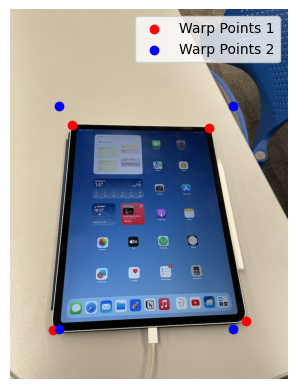

In [3]:
# Plot the image
plt.imshow(computer_screen)

# Plot the points on the image
plt.scatter(warped_points_1[:, 0], warped_points_1[:, 1], c='r', label='Warp Points 1')
plt.scatter(warped_points_2[:, 0], warped_points_2[:, 1], c='b', label='Warp Points 2')

plt.legend()
plt.axis('off')
plt.show()

## Recover homography

In [4]:
# Compute the homography matrix
H = computeH(warped_points_1, warped_points_2)
print(H)

[[ 1.52333900e+00  2.64888668e-01 -1.72108177e+02]
 [-7.23715776e-02  2.21951598e+00 -3.60203781e+02]
 [-1.54841283e-04  9.33248462e-04  1.00000000e+00]]


## Warp the Images

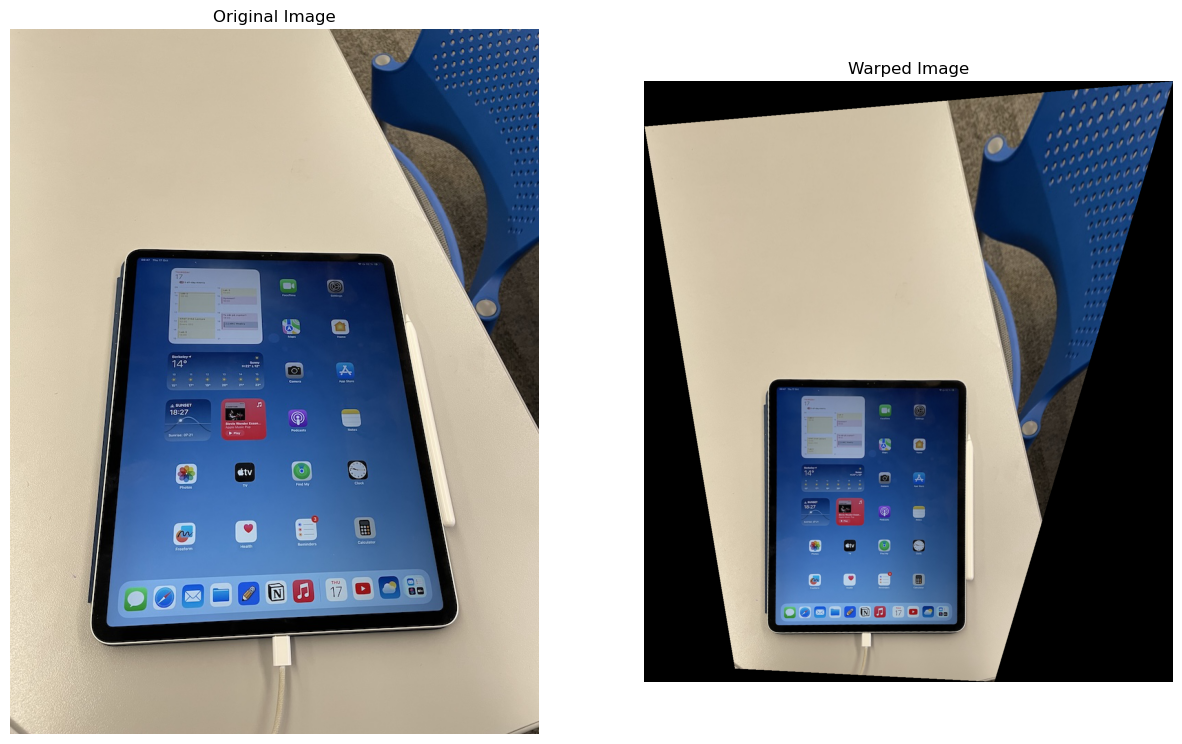

In [5]:
im_warped, _, _ = warpImage(computer_screen, H)

# Display the result
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(computer_screen)
plt.title('Original Image')
plt.axis('off')

# Warped image
plt.subplot(1, 2, 2)
plt.imshow(im_warped)
plt.title('Warped Image')
plt.axis('off')

plt.show()

## Blend the Images into Mosaics

In [6]:
# Load images and points
panorama_left = plt.imread('../data/4a/img/IMG_8405.jpeg')
panorama_right = plt.imread('../data/4a/img/IMG_8406.jpeg')

with open('../data/4a/points/berkeley.json', 'r') as f:
    points = json.load(f)

im1_points = np.array(points["im1Points"])
im2_points = np.array(points["im2Points"])

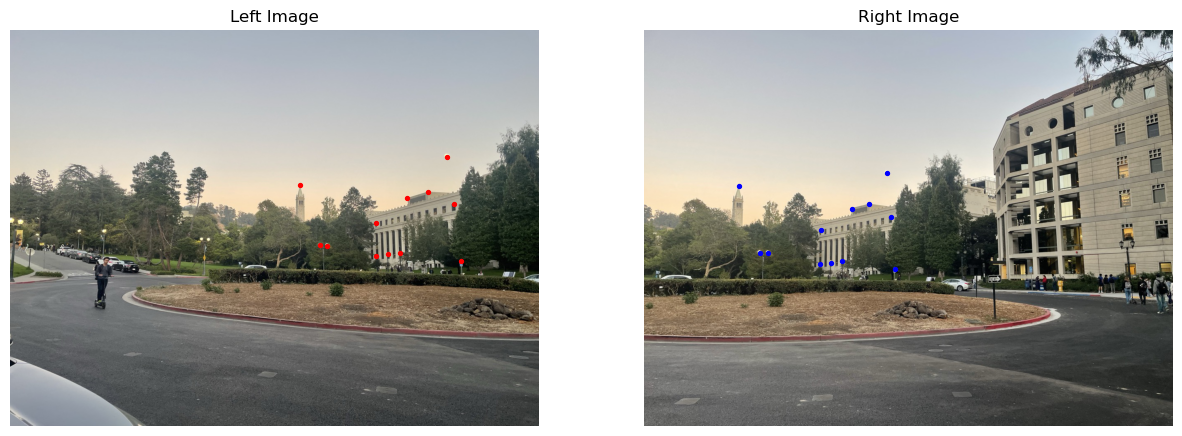

In [7]:
plt.figure(figsize=(15, 10))

# Plot the left image
plt.subplot(1, 2, 1)
plt.imshow(panorama_left)
plt.scatter(im1_points[:, 0], im1_points[:, 1], c='r', s=8, label='Left Points')
plt.title('Left Image')
plt.axis('off')

# Plot the right image
plt.subplot(1, 2, 2)
plt.imshow(panorama_right)
plt.scatter(im2_points[:, 0], im2_points[:, 1], c='b', s=8, label='Right Points')
plt.title('Right Image')
plt.axis('off')

plt.show()

In [8]:
H2 = computeH(im1_points, im2_points)

# Warp the right image to the left image's perspective
warped_left, min_x, min_y = warpImage(panorama_left, H2)

# Warp the points from the right image to the left image's perspective
warped_points = warpPoints(im1_points, H2, min_x, min_y)

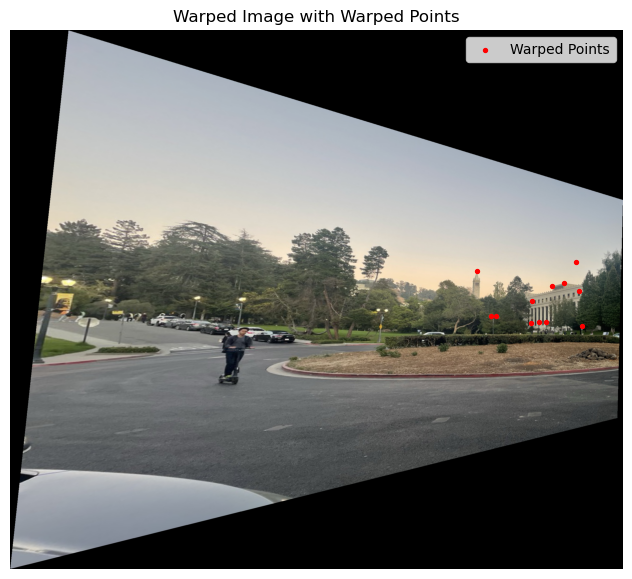

In [9]:
plt.figure(figsize=(10, 7))

# Display the warped image
plt.imshow(warped_left)
plt.scatter(warped_points[:, 0], warped_points[:, 1], c='r', s=8, label='Warped Points')

plt.legend()
plt.title('Warped Image with Warped Points')
plt.axis('off')
plt.show()

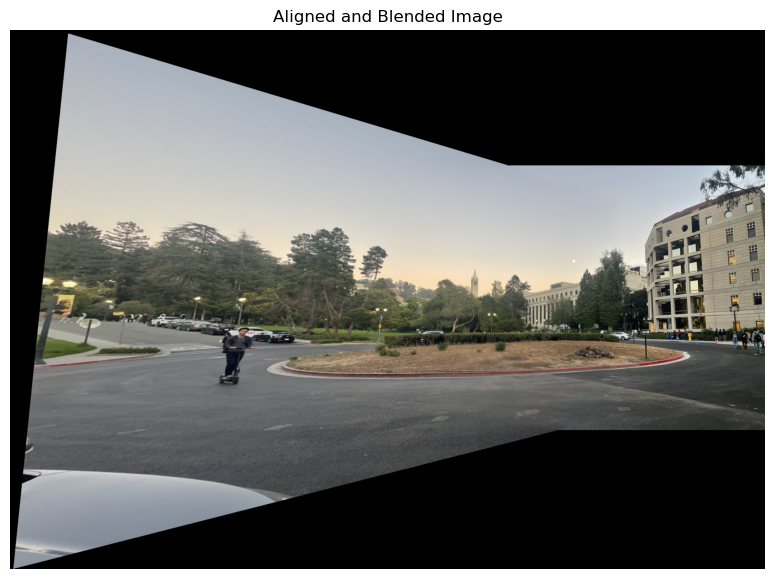

In [10]:
# Align and blend the images
result_image = align_and_blend_images(warped_left, panorama_right, warped_points, im2_points)

# Display the result
plt.figure(figsize=(10, 7))
plt.imshow(result_image)
plt.title('Aligned and Blended Image')
plt.axis('off')
plt.show()